#### Teoria de circuitos II

# Tarea semanal 0

Autor: Josue Yrcañaupa

### Red circuital

![Circuito](Circuito.png)

### Obtencion de la funcion de transferencia

Igualo las corrientes de $R_1$ y $R_2$ y defino el nodo con $V_x$:

$I_{R_1} = I_{R_2} \quad\to\quad \displaystyle\frac{V_1-V_x}{R_1}=\frac{V_x-V_2}{R_2} \quad\to\quad
\frac{V_1}{R_1}+\frac{V_2}{R_2}=\frac{V_x}{R_2}+\frac{V_x}{R_1} \quad\to\quad
\displaystyle\frac{V_1}{R_1}+\frac{V_2}{R_2}=V_x\cdot\frac{R_1+R_2}{R_1\cdot R_2}\quad (1)$

Obtengo otra ecuacion de $V_x$ con un divisor de tension:

$\displaystyle V_x=\frac{R_3}{R_3+\frac{1}{SC_1}}\cdot V_1 \quad\to\quad
\displaystyle\frac{SC_1R_3V_1}{SC_1R_3+1}\quad (2)$

Reemplazo la ecuacion $(2)$ en la $(1)$:

$\displaystyle\frac{V_1}{R_1}+\frac{V_2}{R_2}=\frac{SC_1R_3V_1}{SC_1R_3+1}\cdot\frac{R_1+R_2}{R_1\cdot R_2}$

Despejo para obtener la transferencia:

$\displaystyle\frac{V_1}{R_1}+\frac{V_2}{R_2}=V_1\cdot\displaystyle\left(\frac{SR_3R_1C_1+SR_3R_2C_1}{SR_3R_2R_1C_1+R_1R_2}\right)
\quad\to\quad V_1\cdot\left ( \frac{1}{R_1}-\frac{SR_3R_1C_1+SR_3R_2C_1}{SR_3R_2R_1C_1+R_2R_1}\right )
=-\frac{V_2}{R_2}$

$V_1\cdot\displaystyle\frac{SR_3R_2R_1C_1+R_2R_1-SR_3R_1^{2}C_1-SR_3R_2R_1C_1}
{R_1(SR_3R_2R_1C_1+R_2R_1)}=-\frac{V_2}{R_2} \quad\to\quad
\frac{R_2^2-SR_3R_2R_1C_1}{R_1(SR_3R_2C_1+R_2)}=-\frac{V_2}{V_1}$

$T=\displaystyle\frac{V_2}{V_1}=\frac{SR_3R_2R_1C_1-R_2^2}{R_1(SR_3R_2C_1+R_2)}=
\frac{R_3R_2R_1C_1}{R_3R_2R_1C_1}\cdot
\frac{S-\frac{R_2^{2}}{R_3R_2R_1C_1}}
{S+\frac{R_2}{R_3R_2C_1}}
\quad\to\quad T=\frac{S-\frac{R_2}{R_3R_1C_1}}{S+\frac{1}{R_3C_1}}$

A continuacion obtengo modulo y fase de la transferencia:

$T(S=j\omega)=\displaystyle\frac{j\omega-\frac{R_2}{R_3R_1C_1}}{j\omega+\frac{1}{R_3C_1}};\qquad
\left| T(\omega) \right| = \frac{ \sqrt{ \omega^2 + \left( \frac{R_2}{R_3 R_1 C_1} \right)^2 } }
{ \sqrt{ \omega^2 + \left( \frac{1}{R_3 C_1} \right)^2 } }$

$\gamma(\omega)=arctg\left(\displaystyle\frac{-\omega R_3R_1C_1}{R_2} \right) - 
arctg\left( \omega R_3C_1 \right)$

Finalmente, el diagrama de polos y ceros:

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

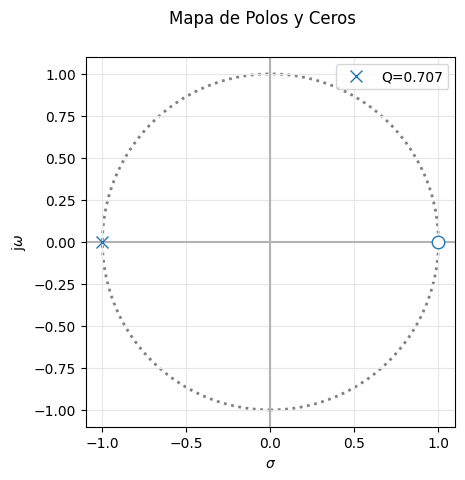

In [19]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap

qq=0.707

my_tf = TransferFunction( [1,-1], [1, 1] )

plt.close('all')

pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq)) #S plane pole/zero plot

### Normalizacion de la transferencia:

Identifico los parametros $\omega_0$ y $Q_0$:

$T=\displaystyle\frac{S-\frac{R_2}{R_3R_1C_1}}{S+\frac{1}{R_3C_1}} \qquad\quad
\frac{\omega_0}{Q_0}=1 \quad y \quad \omega_0^2=\frac{1}{R_3C_1}$

Ademas, simplifico los calculos con la siguiente igualdad:

$R_3=R_2=R_1 \quad\to\quad T=\displaystyle\frac{S-\frac{1}{R_3C_1}}{S+\frac{1}{R_3C_1}}=
\frac{S-\omega_0^2}{S+\omega_0^2}$

Luego, aplico la siguiente normalizacion y factor de escala:

$\left\{\begin{matrix}
C'=C\cdot\displaystyle\frac{\Omega_\omega}{\Omega_Z} \\
R'=\displaystyle\frac{R}{\Omega_Z}\\
S'=\displaystyle\frac{S}{\Omega_\omega}
\end{matrix}\right.
\qquad
\left\{\begin{matrix}
\Omega_\omega=\displaystyle\frac{1}{R_3C_1}\\
\Omega_Z=R_3
\end{matrix}\right.
$

$C'=C\cdot\displaystyle\frac{\Omega_\omega}{\Omega_Z}=
C\cdot\displaystyle\frac{1}{R_3C_1}\cdot R_3=1$

$R_3'= \displaystyle\frac{R_3}{\Omega_Z}=\frac{R_3}{R_3}=1 \quad$ 
y $\quad S'=\displaystyle\frac{S}{\Omega_\omega}=\frac{1}{1/(R_3C_1)} $

Finalmente obtengo la normalizacion de la transferencia:

$T=\displaystyle\frac{S-\frac{1}{R_3C_1}}{S+\frac{1}{R_3C_1}}=
\frac{\frac{S'}{R_3C_1}-\frac{1}{R_3C_1}} {\frac{S'}{R_3C_1}-\frac{1}{R_3C_1}}=
\frac{S'-1}{S'+1}$

### Simulacion de la transferencia normalizada (python):

(-40.0, 20.0)

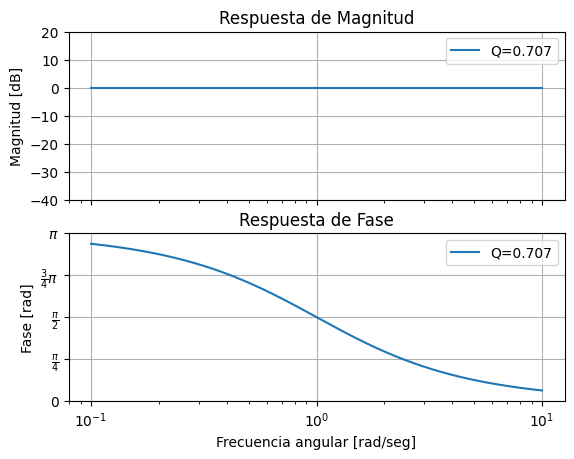

In [22]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import bodePlot

qq = np.sqrt(2)/2

my_tf = TransferFunction( [1,-1], [1, 1] )

plt.close('all')

bodePlot(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq) )

fig = plt.figure(2)
axs = fig.get_axes()
axs[0].set_ylim([-40, 20]) 

### Respuesta en frecuencia (LTspice):

<img src="./Simulacion.jpeg" width="800" /> 

### Conclusion final:

Si bien la transferencia del filtro no corresponde a una estructura bicuadrada, se verifica en el grafico de la respuesta en frecuencia que no hay ganancia respecto al modulo, pero si una variacion respecto a la fase. En ese grafico se observa distintos desfasajes correspondientes a diferentes frecuencias, por lo que concluimos que es un filtro pasa todo cambiador de fase.


Si comparamos MF-103 con este circuito vemos que no son iguales, aun si compararamos las etapas, debido a que estas tienen otros 
componentes agregados. El esquematico nos muestra varios filtros pasa todo en cascada que suman la señal original con la filtrada por las etapas, de forma tal que se pueda cancelar o reforzar la señal y tiene como finalidad obtener un efecto especial en la señal de entrada.